# TP 2 - Procesamiento del Lenguaje Natural

## Librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, classification_report
#from mlxtend.preprocessing import DenseTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Dense, Dropout, Activation
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import LSTM, Embedding
# from tensorflow.keras.layers import Dense, Input, Dropout
import os

In [3]:
df = pd.read_csv('train.csv', sep=',')
df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


In [4]:
df.shape

(50000, 3)

In [5]:
df_test = pd.read_csv('test.csv', sep=',')
df_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [6]:
def mostrar_scores(y_test: np.ndarray, y_prediccion: np.ndarray):
    accuracy = accuracy_score(y_test,y_prediccion)
    recall = recall_score(y_test,y_prediccion)
    f1 = f1_score(y_test,y_prediccion,)
    precision = precision_score(y_test,y_prediccion)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

### Preprocesamiento

In [7]:
def cantidad_de_palabras(review):
    return len(review.split())

In [8]:
df_copia = df.copy()
df_copia['cantidad_de_palabras'] = df_copia['review_es'].apply(cantidad_de_palabras)

In [9]:
df_copia['cantidad_de_palabras'].describe()

count    50000.000000
mean       237.233680
std        179.529306
min          6.000000
25%        123.000000
50%        172.000000
75%        293.000000
max       2450.000000
Name: cantidad_de_palabras, dtype: float64

In [10]:
df_copia['review_es'].duplicated().sum()

401

In [11]:
df = df.drop_duplicates(subset=['review_es'])
df.shape

(49599, 3)

In [ ]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['text'])

vocabulario = vectorizer.get_feature_names_out()

numero_de_palabras_unicas = len(vocabulario)

print("Numero de palabras unicas en el dataset pre preprocesamiento:", numero_de_palabras_unicas)

In [12]:
df_preprocesado = df.copy()
#si ya estan descargados los paquetes no es necesario volver a hacerlo.
#nltk.download('stopwords')
#nltk.download('punkt')

stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Zñáéíóúü\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = nltk.stem.SnowballStemmer('spanish')
    stems = [stemmer.stem(token) for token in tokens]
    preprocessed_text = ' '.join(stems)
    return preprocessed_text

df_preprocesado['review_es'] = df_preprocesado['review_es'].apply(preprocess_text)

In [13]:
df_preprocesado.head(10)

,ID,review_es,sentimiento
0,0,critic mencion despues ver sol oz episodi enga...,positivo
1,1,pequeñ pequeñ produccionl tecnic filmacion inc...,positivo
2,2,pens maner maravill pas tiemp fin seman veran ...,positivo
3,3,basic famili niñ pequeñ jak piens zombi armari...,negativo
4,4,amor tiemp pett mattei pelicul visual impresio...,positivo
5,5,probabl pelicul favorit tiemp histori desinter...,positivo
6,6,segur gust ver resurreccion seri seahunt dat t...,positivo
7,7,espectacul ide increibl fresc innov años emit ...,negativo
8,8,alent comentari posit pelicul aqu des ver peli...,negativo
9,9,si gust ris original desgarr gust peliculasi j...,positivo


In [ ]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['text'])

vocabulario = vectorizer.get_feature_names_out()

numero_de_palabras_unicas = len(vocabulario)

print("Numero de palabras unicas en el dataset post preprocesamiento:", numero_de_palabras_unicas)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
                                          df['review_es'], df['sentimiento'], 
                                          test_size=0.3, random_state=42)

### Modelos de Bayes Naïve

##### Vamos a probar en primer lugar con un count vectorizer y luego con un tfidf vectorizer par ver con cual obtenemos merjores resultados

In [16]:
modelo_count = make_pipeline(CountVectorizer(), MultinomialNB())
modelo_tfidf = Pipeline([('tvec', TfidfVectorizer()), ('mnb',MultinomialNB())])

##### Count vectorizer

In [11]:
modelo_count.fit(x_train, y_train)

prediccion = modelo_count.predict(x_test)

# mostrar_scores(y_test, prediccion)

In [17]:
modelo_tfidf.fit(x_train, y_train)

prediccion = modelo_tfidf.predict(x_test)

# mostrar_scores(y_test, prediccion)

In [18]:
df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer(max_features=7000)
modelo_tfidf = make_pipeline(vectorizer, MultinomialNB(alpha=0.5))
modelo_tfidf.fit(X_train, y_train)

prediccion = modelo_tfidf.predict(X_test)

mostrar_scores(y_test, prediccion)

Accuracy: 0.8250672043010753
Recall: 0.8417653390742734
Precision: 0.8142652609657686
f1 score: 0.8277869665894807


In [19]:
prediccion_train = modelo_tfidf.predict(X_train)

mostrar_scores(y_train, prediccion_train)

Accuracy: 0.846193726777845
Recall: 0.856365303082388
Precision: 0.8406636670416198
f1 score: 0.8484418459442583


In [20]:
df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)


vectorizer = TfidfVectorizer(max_features=7000)
modelo_gauss = make_pipeline(vectorizer,   DenseTransformer() ,GaussianNB())
modelo_gauss.fit(X_train, y_train)

prediccion = modelo_gauss.predict(X_test)

mostrar_scores(y_test, prediccion)

Accuracy: 0.7362231182795699
Recall: 0.6990043057050592
Precision: 0.7547580996658434
f1 score: 0.7258120852252882


In [293]:
prediccion_train = modelo_gauss.predict(X_train)

mostrar_scores(y_train, prediccion_train)

Accuracy: 0.8185714285714286
Recall: 0.8056401125725117
Precision: 0.8254575413405519
f1 score: 0.8154284385536564


In [294]:
df_test = pd.read_csv('test.csv', sep=',')
df_test_procesado = df_test.copy()

prediccion = modelo_tfidf.predict(df_test_procesado['review_es'].apply(preprocess_text))
prediccion = np.where(prediccion == 0, 'negativo', 'positivo')

df_entrega = df_test.copy()


df_entrega['sentimiento'] = prediccion
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('entrega.csv', index=False)

### Regresión Logística

In [15]:
df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

modelo_regresion_logistica = Pipeline([('tfidf', TfidfVectorizer(max_features=7000)), ('lr', LogisticRegression(
    # penalty='l2',
    # C=0.06,
    # solver='lbfgs',
    # max_iter=200, 
    # l1_ratio=None, 
    # tol=1e-4 
))])
modelo_regresion_logistica.fit(X_train, y_train)

prediccion = modelo_regresion_logistica.predict(X_test)

mostrar_scores(y_test, prediccion)

Accuracy: 0.8633064516129032
Recall: 0.8795748116254036
Precision: 0.8516154247003648
f1 score: 0.8653693407466242


In [16]:
prediccion_train = modelo_regresion_logistica.predict(X_train)

mostrar_scores(y_train, prediccion_train)

Accuracy: 0.895964745528385
Recall: 0.9107940873152286
Precision: 0.8855280748663101
f1 score: 0.8979833926453142


In [17]:
df_test = pd.read_csv('test.csv', sep=',')
df_test_copia = df_test.copy()
df_test_copia['review_es'] = df_test_copia['review_es'].apply(preprocess_text)

prediccion = modelo_regresion_logistica.predict(df_test_copia['review_es'])
prediccion = np.where(prediccion == 0, 'negativo', 'positivo')

df_entrega = df_test.copy()

df_entrega['sentimiento'] = prediccion
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('lr_upgrade.csv', index=False)

### XGBoost

In [39]:
df_preprocesado_copy = df_preprocesado.copy()
vectorizer = TfidfVectorizer(max_features=9000)
X = vectorizer.fit_transform(df_preprocesado_copy['review_es'])
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})

X_train, X_test, y_train, y_test = train_test_split(X, df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

modelo_xg_boost = XGBClassifier(
    # learning_rate=0.001,
    n_estimators=500,
    # max_depth=5,
    # min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)
modelo_xg_boost.fit(X_train, y_train)

y_pred = modelo_xg_boost.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1_score: {f1}')
f1_train = f1_score(y_train, modelo_xg_boost.predict(X_train))
print(f'F1_score train: {f1_train}')


F1_score: 0.7968364533449428
F1_score train: 0.943711394020242


In [ ]:
tabla = confusion_matrix(y_test, y_pred)
sns.heatmap(tabla, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
df_preprocesado_copy = df_preprocesado.copy()
vectorizer = TfidfVectorizer(max_features=7000)
X = vectorizer.fit_transform(df_preprocesado_copy['review_es'])
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})

X_train, X_test, y_train, y_test = train_test_split(X, df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

modelo_xg_boost = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1,  0.3,  0.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate': list(np.linspace(0.001, 0.1, 10)),
        'n_estimators': [ 300, 400, 500, 600 ],
        }

folds = 5
n_iter = 75
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
random_search = RandomizedSearchCV(modelo_xg_boost, param_distributions=params, n_iter=n_iter, scoring='f1', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )
# random_search.fit(X_train, y_train)

print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best score:')
print(random_search.best_score_ * 2 - 1)

In [ ]:
y_pred = random_search.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1_score: {f1}')
f1_train = f1_score(y_train, random_search.predict(X_train))
print(f'F1_score train: {f1_train}')

In [66]:
# colsample_bytree=0.6, gamma=0.1, learning_rate=0.08900000000000001, min_child_weight=10, n_estimators=600, subsample=0.6;, score=0.853
df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)


modelo_xg_boost = Pipeline([
  ('tfidf', TfidfVectorizer(max_features=9000)), 
  ('xgb', XGBClassifier(
        objective='binary:logistic',
        n_jobs=-1,
        random_state=42,
        colsample_bytree=0.6, 
        subsample=0.6,
        gamma=0.3, 
        max_depth=5,
        learning_rate=0.089, 
        min_child_weight=10, 
        n_estimators=700, 
))])

modelo_xg_boost.fit(X_train, y_train)

y_pred = modelo_xg_boost.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1_score: {f1}')
f1_train = f1_score(y_train, modelo_xg_boost.predict(X_train))
print(f'F1_score train: {f1_train}')


F1_score: 0.8520913049214937
F1_score train: 0.9136789928746444


#### Predicción en los datos de test

In [30]:
df_test = pd.read_csv('test.csv', sep=',')
df_test_copia = df_test.copy()
df_test_copia['review_es'] = df_test_copia['review_es'].apply(preprocess_text)

prediccion = modelo_xg_boost.predict(df_test_copia['review_es'])
prediccion = np.where(prediccion == 0, 'negativo', 'positivo')

df_entrega = df_test.copy()

df_entrega['sentimiento'] = prediccion
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('entrega.csv', index=False)

### Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

modelo_random_forest = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=7000)), 
    ('rfc', RandomForestClassifier(
            criterion='entropy',
            n_jobs=-1,
            random_state=42,
            max_depth=75,
            min_samples_leaf=1,
            n_estimators=1000,
    ))])

modelo_random_forest.fit(X_train, y_train)

y_pred = modelo_random_forest.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1_score: {f1}')
f1_train = f1_score(y_train, modelo_random_forest.predict(X_train))
print(f'F1_score train: {f1_train}')

F1_score: 0.8344836740111494
F1_score train: 0.9981128838565791


### Red Neuronal

In [51]:
np.random.seed(1)
tf.random.set_seed(1)
keras.utils.set_random_seed(812)
os.environ['PYTHONHASHSEED']=str(1)


df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

max_words = 2500
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

def red_neuronal_recursiva():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 128, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    # layer = Dense(256,name='FC1')(layer)
    # layer = Activation('relu')(layer)
    # layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = tf.keras.Model(inputs=inputs,outputs=layer)
    return model

model_rnn = red_neuronal_recursiva()
model_rnn.summary()
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.fit(sequences_matrix, y_train, batch_size=128, epochs=10, 
            validation_split=0.3,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

accr = model_rnn.evaluate(test_sequences_matrix, y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

prediccion = model_rnn.predict(test_sequences_matrix)
prediccion = np.where(prediccion >= 0.5, 1, 0)
mostrar_scores(y_test, prediccion)
prediccion = np.where(prediccion == 1, 'positivo', 'negativo')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 128)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 out_layer (Dense)           (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 369,473
Trainable params: 369,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-11-14 18:39:45.161436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-14 18:39:45.163533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-14 18:39:45.163964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

190/190 [==============================] - ETA: 0s - loss: 0.4546 - accuracy: 0.7787

2023-11-14 18:40:07.894209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-14 18:40:07.894730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-14 18:40:07.895438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

190/190 [==============================] - 26s 130ms/step - loss: 0.4546 - accuracy: 0.7787 - val_loss: 0.3605 - val_accuracy: 0.8464
Epoch 2/10
190/190 [==============================] - 24s 126ms/step - loss: 0.3294 - accuracy: 0.8607 - val_loss: 0.3576 - val_accuracy: 0.8446
Epoch 3/10
190/190 [==============================] - 25s 132ms/step - loss: 0.2955 - accuracy: 0.8751 - val_loss: 0.3551 - val_accuracy: 0.8416
Epoch 4/10
465/465 [==============================] - 8s 16ms/step - loss: 0.3863 - accuracy: 0.8355
Test set
  Loss: 0.386
  Accuracy: 0.835
  5/465 [..............................] - ETA: 6s  

2023-11-14 18:41:35.830271: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-14 18:41:35.830845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-14 18:41:35.831544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

465/465 [==============================] - 7s 16ms/step
Accuracy: 0.8354838709677419
Recall: 0.818756727664155
Precision: 0.8467854160868356
f1 score: 0.8325352305376933


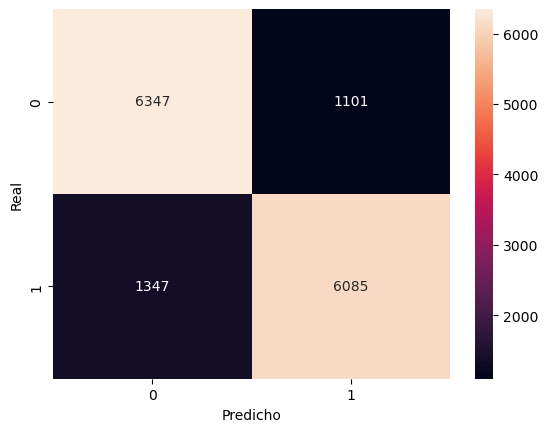

In [52]:
prediccion_heatmap = np.where(prediccion == 'positivo', 1, 0)

tabla = confusion_matrix(y_test, prediccion_heatmap)
sns.heatmap(tabla, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [53]:
train_sequences = tok.texts_to_sequences(X_train)
train_sequences_matrix = pad_sequences(train_sequences, maxlen=max_len)
prediccion_train = model_rnn.predict(train_sequences_matrix)
prediccion_train = np.where(prediccion_train >= 0.5, 1, 0)
mostrar_scores(y_train, prediccion_train)

   5/1085 [..............................] - ETA: 15s 

2023-11-14 18:42:13.945567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-14 18:42:13.946530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-14 18:42:13.947154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1085/1085 [==============================] - 17s 16ms/step
Accuracy: 0.8792015899075434
Recall: 0.8621519422481952
Precision: 0.8937990021382751
f1 score: 0.8776902887139107


### SVM

In [23]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)

modelo_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=7000)), 
    ('scaler', StandardScaler(with_mean=False)),
    ('svm', SVC(kernel='poly', degree=5))])

modelo_svm.fit(X_train, y_train)

y_pred = modelo_svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'F1_score: {f1}')
f1_train = f1_score(y_train, modelo_svm.predict(X_train))
print(f'F1_score train: {f1_train}')

F1_score: 0.18561872909698995


### Ensamble de modelos

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

df_preprocesado_copy = df_preprocesado.copy()
df_preprocesado_copy['sentimiento'] = df_preprocesado_copy['sentimiento'].map({'negativo': 0, 'positivo': 1})
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)


estimators = [('xgb', modelo_xg_boost), ('lr', modelo_regresion_logistica), ('mnb', modelo_tfidf)]
ensamble = VotingClassifier(estimators=estimators, voting='soft')
ensamble.fit(X_train, y_train)

prediccion = ensamble.predict(X_test)
mostrar_scores(y_test, prediccion)

Accuracy: 0.8651881720430108
Recall: 0.8853606027987083
Precision: 0.8507887251099043
f1 score: 0.8677304496900963


In [85]:
prediccion_train = ensamble.predict(X_train)

mostrar_scores(y_train, prediccion_train)

Accuracy: 0.9078314467582592
Recall: 0.9235132347885872
Precision: 0.8962967081850534
f1 score: 0.9097014504204527


#### Prediccion en los datos de test

In [86]:
df_test = pd.read_csv('test.csv', sep=',')
df_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [88]:
df_test_copia = df_test.copy()
df_test_copia['review_es'] = df_test_copia['review_es'].apply(preprocess_text)

prediccion_final = ensamble.predict(df_test_copia['review_es'])
prediccion_final = np.where(prediccion_final == 0, 'negativo', 'positivo')

df_entrega = df_test.copy()

df_entrega['sentimiento'] = prediccion_final
df_entrega.drop('review_es', axis=1, inplace=True)

df_entrega.to_csv('voting_lr_xgb_bn.csv', index=False)

### Red Neuronal Recurrente

In [ ]:
df_copia = df.copy()
X_train, X_test, y_train, y_test = train_test_split(df_preprocesado_copy['review_es'], df_preprocesado_copy['sentimiento'], test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(df_copia['review_es'], df_copia['sentimiento'], test_size=0.3, random_state=42)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, lower = True)
tokenizer.fit_on_texts(x_train)

vocabulario = tokenizer.word_index+1

